In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt

tf.__version__ 

'2.4.1'

In [2]:
Ne = 128  # Number of transducer elements
Nx, Nz = 512, 512 
# Nx, Nz =  387, 609 for PICMUS17

pixels = Nx * Nz

# 2. Test the model on Alpinion/PICMUS17 datasets (nbpw=1)

## 2-1 Load model and weights

In [3]:
model = keras.models.load_model('my_model.tf')
model.load_weights("my_weights.tf")   

## 2-2. Prepare x_test and do prediction

In [4]:
testFilepath = r'E:\Desktop\internshipDeepUS\04_16_2021_(ABLE)\Test_ABLE\Alpinion.mat'
# r'E:\Desktop\internshipDeepUS\04_16_2021_(ABLE)\Test_ABLE\PICMUS17.mat'
testNames = ["contrast","resolution"]
# ['in_vitro_type1','in_vitro_type2','in_vitro_type3','numerical']

In [5]:
testFile = scio.loadmat(testFilepath)

In [6]:
y_predict = np.zeros((pixels,len(testNames)))

for i in range(len(testNames)):
    y_predict[:,i] = np.squeeze(model.predict(x = testFile[testNames[i]]))
    
scio.savemat("Alpinion_predicted.mat", {testNames[i]: y_predict[:,i] for i in range(len(testNames))})

## 2-3. Show one predicted image in a easy way

In [9]:
# the complete code of displaying images is in MATLAB

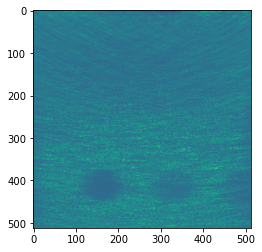

In [8]:
y_predict_max = y_predict[:,0].max()
y_predict_log = 20.*np.log10((1./y_predict_max)*y_predict[:,0]+1)

y_img_data = np.reshape(y_predict_log, (Nz,Nx))

plt.imshow(y_img_data)
#plt.savefig(filename)